In [53]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [21]:
data = yf.download("^GSPC", start = "2020-01-01", end = "2025-01-01")

[*********************100%***********************]  1 of 1 completed


In [34]:
df = pd.DataFrame(data)
df.columns = df.columns.droplevel(1)
df.columns.name = None
df.reset_index(inplace = True)

y = df['Close'].values.reshape(-1,1)
x = df['Date'] = pd.to_datetime(df["Date"]).map(pd.Timestamp.toordinal)
x = x.values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [35]:
reg = linear_model.LinearRegression()
reg.fit(x, y)
y_pred = reg.predict(x)


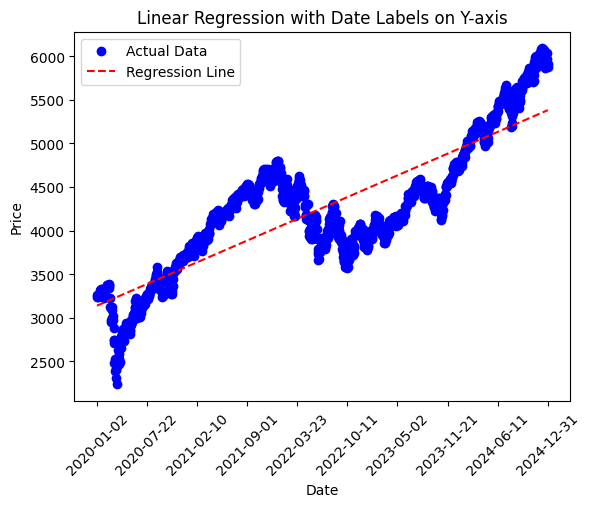

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y, color="blue", label="Actual Data")
ax.plot(x, y_pred, color="red", linestyle="--", label="Regression Line")

tick_positions = np.linspace(x.min(), x.max(), num=10, dtype=int)
tick_labels = [pd.Timestamp.fromordinal(int(tick)).strftime('%Y-%m-%d') for tick in tick_positions]

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45)

# Labels and legend
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Linear Regression with Date Labels on Y-axis")
plt.legend()
plt.show()